## Pin Code Recognition
The first digit indicates one of the regions. The second digit indicates the sub region or one of the postal circles (States). The third digit indicates a sorting / revenue district. The last 3 digits refer to the delivery Post Office.

**Meaning Of PIN code Digits**
![](pinmeaning.PNG)
![](pinmeaning2.PNG)
If the PINCODE is 500072, then 5 indicates Southern region & 50 indicates Telangana. 500 indicates the district of Rangareddy/Hyderabad and the last 3 digits (072) indicate the KPHB colony post office in this area. That is how the postal department sorts the incoming mails and routes them to the correct post office.

## TensorFlow
TensorFlow is an open-source software library for dataflow programming across a range of tasks. It is a symbolic math library, and is also used for machine learning applications such as neural networks. It is used for both research and production at Google, often replacing its closed-source predecessor, DistBelief.

TensorFlow computations are expressed as stateful dataflow graphs. The name TensorFlow derives from the operations that such neural networks perform on multidimensional data arrays. These arrays are referred to as "tensors". In June 2016, Dean stated that 1,500 repositories on GitHub mentioned TensorFlow, of which only 5 were from Google.

TensorFlow is cross-platform. It runs on nearly everything: GPUs and CPUs—including mobile and embedded platforms—and even tensor processing units (TPUs), which are specialized hardware to do tensor math on.

The TensorFlow distributed execution engine abstracts away the many supported devices and provides a high performance-core implemented in C++ for the TensorFlow platform. On top of that sit the Python and C++ frontends (with more to come). The Layers API provides a simpler interface for commonly used layers in deep learning models. On top of that sit higher-level APIs, including Keras (more on the Keras.io site) and the Estimator API, which makes training and evaluating distributed models easier.

**Constants**

In [2]:
import tensorflow as tf
sess=tf.Session()
a=tf.constant(6)
b=tf.constant(3)
a

<tf.Tensor 'Const:0' shape=() dtype=int32>

In [3]:
sess.run(a)

6

In [4]:
# constants can be 2D matrices, strings etc.
a1 = tf.constant([[3,3]])
a2 = tf.constant([[3,2],[3,3]])
res = tf.matmul(a1, a2)
sess.run(res)


array([[18, 15]])

In [5]:
a=tf.constant(8)
a=tf.constant(28) # is perfectly valid as a new tensor object is created here 

sess.run(a)

28

**Variables**

In [7]:
var1=tf.Variable(100)
sess.run(tf.global_variables_initializer()) # initializing global variable var1 now
sess.run(var1)  #var1 containes old value b

100

In [11]:
temp=var1.assign(122) #thats why called varibles
sess.run(temp)  
print(sess.run(var1))

122


**Placeholders**

Placeholders are used when values are supposed to be provided later.

In [12]:
x =tf.placeholder(tf.int32) 
y =tf.placeholder(tf.int32)
v=3*x
sess=tf.Session()
sess.run(v,feed_dict={x:20})

60

In [13]:
x =tf.placeholder(tf.int32,shape=(2,2))
y = x * tf.constant(12)
sess.run(y, feed_dict={x:[[1,2], [4,5]]})

array([[12, 24],
       [48, 60]])

## Digit Recognizier Using TensorFlow

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import  input_data
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [15]:
mnist.train.images.shape

(55000, 784)

In [16]:
mnist.train.labels.shape

(55000, 10)

In [17]:
image1=mnist.train.images[4119]
image1=np.array(image1,float)
image1=image1.reshape((28,28))

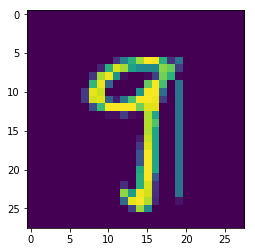

In [18]:
plt.imshow(image1)
plt.show()

In [19]:
n_input=784
n_hl1=256
n_hl2=256
n_output=10

weights={
    'h1':tf.Variable(tf.random_normal(shape=(n_input,n_hl1))), 
    'h2':tf.Variable(tf.random_normal(shape=(n_hl1,n_hl2))),    
    'out':tf.Variable(tf.random_normal(shape=(n_hl2,n_output))) 
}
biases={
    'h1':tf.Variable(tf.random_normal(shape=(n_hl1,))),         
    'h2':tf.Variable(tf.random_normal(shape=(n_hl2,))),         
    'out':tf.Variable(tf.random_normal(shape=(n_output,)))      
}

In [20]:
def fwd_prop(x,weights,biases):
    layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    layer1=tf.nn.relu(layer1)   
    
    layer2=tf.add(tf.matmul(layer1,weights['h2']),biases['h2'])
    layer2=tf.nn.relu(layer2)
    
    output=tf.add(tf.matmul(layer2,weights['out']),biases['out'])
    return output

In [21]:
x=tf.placeholder('float',[None,n_input])    
y=tf.placeholder(tf.int32,[None,n_output])
pred=fwd_prop(x,weights,biases)

In [22]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred,labels=y)) #logits is because of multiple classes 

In [23]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)

In [24]:
optimize=optimizer.minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [25]:
batch_size=100
for i in range(25):
    num_batches=mnist.train.num_examples//batch_size
    total_cost=0
    for j in range(num_batches):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        c,_=sess.run([cost,optimize],feed_dict={x:batch_x,y:batch_y})
        total_cost+=c
    print(total_cost)    

25470.2491958
4823.79512126
2608.86271015
1889.75779545
1474.62110285
1168.70110431
1219.64641168
1014.81162643
922.471451166
757.44732996
798.348160325
624.55007864
642.040375067
594.762212956
399.140004131
480.448584297
370.694821787
402.721022615
313.184212845
309.782306282
254.669104677
259.031151767
183.59731102
175.117321657
193.215624113


In [26]:
predictions=tf.argmax(pred,1)
true_labels=tf.argmax(y,1)
correct_preds=tf.equal(predictions,true_labels)
correct_ones=sess.run(correct_preds,feed_dict={x:mnist.test.images,y:mnist.test.labels})
correct_ones.sum()

9591

## Convolution Neural Networks

A covnets is a sequence of layers, and every layer transforms one volume to another through differentiable function.
Types of layers:
Let’s take an example by running a covnets on of image of dimension 32 x 32 x 3.

**Input Layer**: This layer holds the raw input of image with width 32, height 32 and depth 3.

**Convolution Layer**: This layer computes the output volume by computing dot product between all filters and image patch. Suppose we use total 12 filters for this layer we’ll get output volume of dimension 32 x 32 x 12.

**Activation Function Layer**: This layer will apply element wise activation function to the output of convolution layer. Some common activation functions are RELU: max(0, x), Sigmoid: 1/(1+e^-x), Tanh, Leaky RELU, etc. The volume remains unchanged hence output volume will have dimension 32 x 32 x 12.

**Pool Layer**: This layer is periodically inserted in the covnets and its main function is to reduce the size of volume which makes the computation fast reduces memory and also prevents from overfitting. Two common types of pooling layers are max pooling and average pooling. If we use a max pool with 2 x 2 filters and stride 2, the resultant volume will be of dimension 16x16x12.
![](maxpool.png)
Dropout is one of the most interesting ways to regularize your neural network. 
Dropout is a regularization technique where, while you're updating a layer of your neural net, you randomly don't update, or "dropout," half of the layer.

**CNN Architechture**

![](CNNarchi.PNG)

**Implementation**

In [27]:
input_width = 28
input_height = 28
input_channels = 1
input_pixels = 784

n_conv1 = 32
n_conv2 = 64
stride_conv1 = 1
stride_conv2 = 1
conv1_k = 5
conv2_k = 5
max_pool1_k = 2
max_pool2_k = 2

n_hidden = 1024
n_out = 10

input_size_to_hidden = (input_width//(max_pool1_k*max_pool2_k)) * (input_height//(max_pool1_k*max_pool2_k)) *n_conv2

In [28]:
weights = {
    "wc1" : tf.Variable(tf.random_normal([conv1_k, conv1_k, input_channels, n_conv1])),
    "wc2" : tf.Variable(tf.random_normal([conv2_k, conv2_k, n_conv1, n_conv2])),
    "wh1" : tf.Variable(tf.random_normal([input_size_to_hidden, n_hidden])),
    "wo" : tf.Variable(tf.random_normal([n_hidden, n_out]))
}

biases = {
    "bc1" : tf.Variable(tf.random_normal([n_conv1])),
    "bc2" : tf.Variable(tf.random_normal([n_conv2])),
    "bh1" : tf.Variable(tf.random_normal([n_hidden])),
    "bo" : tf.Variable(tf.random_normal([n_out])),
}

In [29]:
def conv(x, weights, bias, strides = 1):
    out = tf.nn.conv2d(x, weights, padding="SAME", strides = [1, strides, strides, 1])
    out = tf.nn.bias_add(out, bias)
    out = tf.nn.relu(out)
    return out

def maxpooling(x, k = 2):
    return tf.nn.max_pool(x, padding = "SAME", ksize = [1, k, k, 1], strides = [1, k, k, 1])

In [30]:
def cnn(x, weights, biases, keep_prob):
    x = tf.reshape(x, shape = [-1 ,input_height, input_width, input_channels])
    conv1 = conv(x, weights['wc1'], biases['bc1'], stride_conv1)
    conv1_pool = maxpooling(conv1, max_pool1_k)
    
    conv2 = conv(conv1_pool, weights['wc2'], biases['bc2'], stride_conv2)
    conv2_pool = maxpooling(conv2, max_pool2_k)
    
    hidden_input = tf.reshape(conv2_pool, shape = [-1, input_size_to_hidden])
    hidden_output_before_activation = tf.add(tf.matmul(hidden_input, weights['wh1']), biases['bh1'])
    hidden_output_before_dropout = tf.nn.relu(hidden_output_before_activation)
    hidden_output = tf.nn.dropout(hidden_output_before_dropout, keep_prob) 
   
    output = tf.add(tf.matmul(hidden_output, weights['wo']), biases['bo'])
    return output

In [31]:
x = tf.placeholder("float", [None, input_pixels])
y = tf.placeholder(tf.int32, [None, n_out])
keep_prob = tf.placeholder("float")
pred = cnn(x, weights, biases, keep_prob)

In [32]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels = y))

In [33]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [34]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost,optimize], feed_dict={x:batch_x , y:batch_y, keep_prob:0.8})
        total_cost += c
    print(total_cost)

In [ ]:
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions,correct_preds  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels, keep_prob:1.0})
correct_preds.sum()